# Predicting earnings expectations with sparse data

In [ ]:
# Import the relevant Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fix the random seed so numbers can be reproduced
rng = np.random.default_rng(seed=11)

In [ ]:
# Create 9 grid points for the model parameter, from 0.1 to 0.9 spaced 0.1 apart
p = np.arange(0.1, 1, 0.1)

# Since all parameters are uniformly distributed and equally likely, the probability for each parameter = 1/n = 1/9
prior = 1/len(p)

# Create a Pandas dataframe with the relevant columns to store individual calculations
earnings_beat = pd.DataFrame(columns = ['parameter', 'prior', 'likelihood', 'posterior*', 'posterior'])

# Store each parameter value
earnings_beat['parameter'] = p

# Loop computes the unnormalized posterior probability distribution for each value of the parameter
for i in range(0,len(p)):
  earnings_beat.iloc[i,1] = prior
  #Since our training data has three earnings beats in a row, each having a probability of p
  earnings_beat.iloc[i,2] = p[i]**3
  #Use the unnormalized inverse probability rule
  earnings_beat.iloc[i,3] = prior * (p[i]**3)

# Normalize the probability distribution so that all values add up to 1
earnings_beat['posterior'] = earnings_beat['posterior*']/sum(earnings_beat['posterior*'])

# Display the data frame to show each calculation
earnings_beat

,parameter,prior,likelihood,posterior*,posterior
0,0.1,0.111111,0.001,0.000111,0.000494
1,0.2,0.111111,0.008,0.000889,0.003951
2,0.3,0.111111,0.027,0.003,0.013333
3,0.4,0.111111,0.064,0.007111,0.031605
4,0.5,0.111111,0.125,0.013889,0.061728
5,0.6,0.111111,0.216,0.024,0.106667
6,0.7,0.111111,0.343,0.038111,0.169383
7,0.8,0.111111,0.512,0.056889,0.25284
8,0.9,0.111111,0.729,0.081,0.36


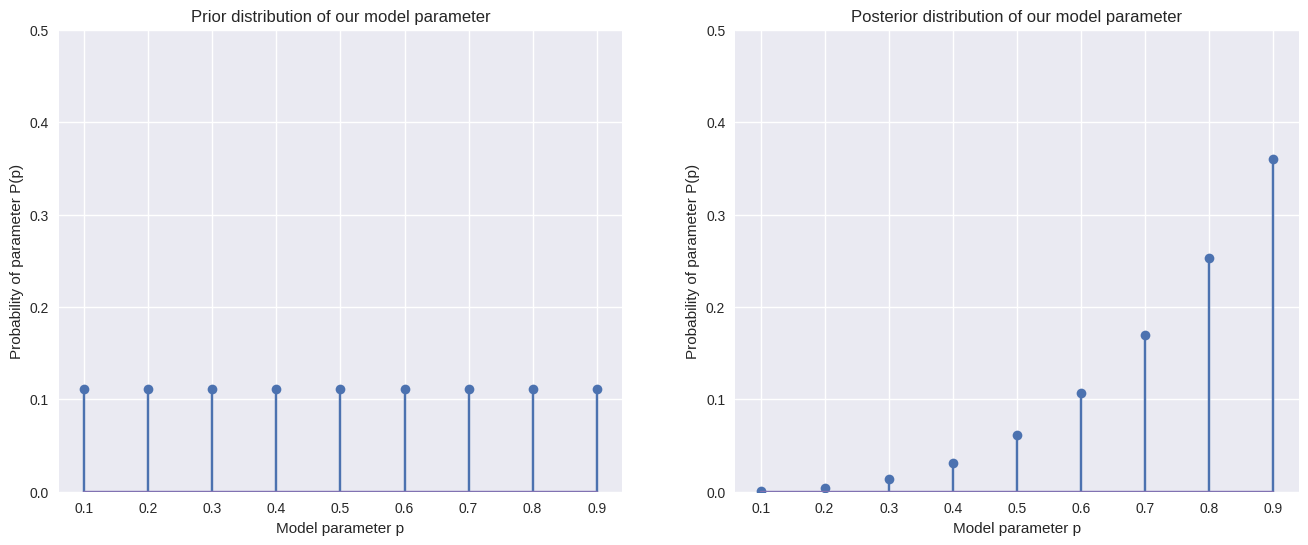

In [ ]:
# Plot the prior and posterior probability distribution for the model parameter
plt.figure(figsize=(16,6)), plt.subplot(1,2,1), plt.ylim([0,0.5])
plt.stem(earnings_beat['parameter'],earnings_beat['prior'])
plt.xlabel('Model parameter p'), plt.ylabel('Probability of parameter P(p)'), plt.title('Prior distribution of our model parameter')

plt.subplot(1,2,2), plt.ylim([0,0.5])
plt.stem(earnings_beat['parameter'],earnings_beat['posterior'])
plt.xlabel('Model parameter p'), plt.ylabel('Probability of parameter P(p)'), plt.title('Posterior distribution of our model parameter')
plt.show();

In [ ]:
# Since P(yi=1|pi) = pi, we compute the probability weighted average of observing y=1 using our prior probabilities as the weights
# This probability weighted average gives us the prior predictive probability of observing y=1 before observing any data
prior_predictive_1 = sum(earnings_beat['parameter'] * earnings_beat['prior'])

# The prior predictive probability of observing outcome y=0 is the complement of P(y=1) calculated above
prior_predictive_0 = 1 - prior_predictive_1

# Since we have picked a uniform distribution for our parameter, our model predicts that both outcomes are equally likely prior to observing any data
prior_predictive_0, prior_predictive_1

(0.5, 0.5)

In [ ]:
# Since P(yi=1|pi) = pi, we compute the probability weighted average of observing y=1 but now we use the posterior probabilities as the weights
# This probability weighted average gives us the posterior predictive probability of observing y=1 after observing in-sample data D={y1=1, y2=1, y3=1}
posterior_predictive_1 = sum(earnings_beat['parameter'] * earnings_beat['posterior'])

# The posterior predictive probability of observing outcome y=0 is the complement of P(y=1|D) calculated above
posterior_predictive_0 = 1- posterior_predictive_1

# After observing data D, our model predicts that observing y=1 is about 3 times more likely than observing y=0
round(posterior_predictive_0,3), round(posterior_predictive_1,3)

(0.243, 0.757)

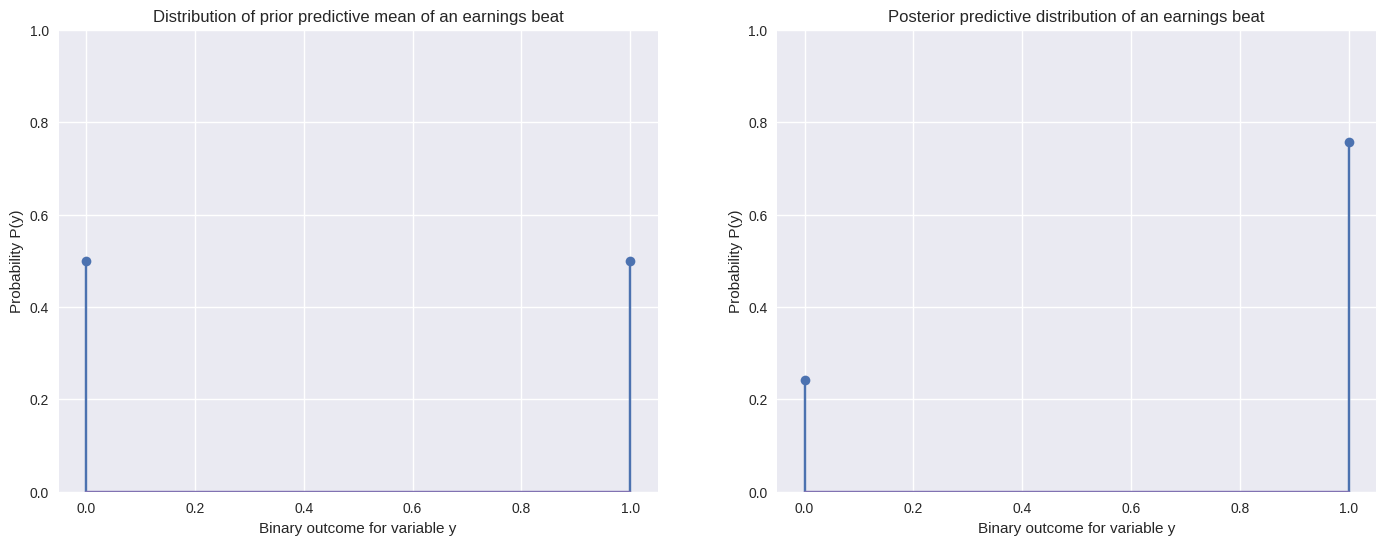

In [ ]:
# Plot the prior and posterior predictive probability distribution for the event outcomes
plt.figure(figsize=(17,6)), plt.subplot(1,2,1), plt.ylim([0,1])
plt.stem([0,1],[prior_predictive_0, prior_predictive_1])
plt.xlabel('Binary outcome for variable y'), plt.ylabel('Probability P(y)'), plt.title('Distribution of prior predictive mean of an earnings beat')

plt.subplot(1,2,2), plt.ylim([0,1])
plt.stem([0,1],[posterior_predictive_0, posterior_predictive_1])
plt.xlabel('Binary outcome for variable y'), plt.ylabel('Probability P(y)'), plt.title('Posterior predictive distribution of an earnings beat')
plt.show()